## 1. Import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fraud_dataset_gcc_only_5000.csv')
df

,transaction_id,user_id,transaction_datetime,transaction_amount,currency,payment_method,card_bin,is_card_present,shipping_country,billing_country,...,item_category,refund_history_count,chargeback_history_count,promo_used,loyalty_points,shipping_speed,billing_name_matches,is_vpn,velocity_flag,fraud_label
0,TX2000000,U23174,2025-06-29 21:38:25,15.81,AED,credit_card,406195.0,1,United Arab Emirates,United Arab Emirates,...,groceries,0,0,0,38,standard,1,0,0,0
1,TX2000001,U23507,2025-06-26 00:55:51,13.09,BHD,apple_pay,NaN,0,Bahrain,Bahrain,...,beauty,0,0,0,58,standard,1,0,0,0
2,TX2000002,U20860,2025-08-20 18:31:16,56.13,SAR,google_pay,NaN,0,Saudi Arabia,Saudi Arabia,...,home,0,0,0,117,express,1,0,0,0
3,TX2000003,U21294,2025-03-24 10:40:24,38.00,KWD,bank_transfer,NaN,0,Kuwait,Kuwait,...,fashion,0,0,1,77,standard,1,0,0,0
4,TX2000004,U21130,2025-04-21 14:42:11,34.59,QAR,credit_card,555358.0,0,Qatar,Qatar,...,beauty,0,1,0,44,standard,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,TX2004995,U20161,2025-04-19 04:28:39,68.18,KWD,credit_card,470783.0,1,Kuwait,Kuwait,...,home,0,0,1,55,standard,1,0,0,0
4996,TX2004996,U23817,2025-08-11 14:46:36,71.61,AED,bank_transfer,NaN,0,United Arab Emirates,United Arab Emirates,...,groceries,0,0,0,62,standard,1,0,0,0
4997,TX2004997,U23451,2025-08-23 13:13:36,142.26,QAR,paypal,NaN,0,Qatar,Qatar,...,fashion,0,0,0,88,express,1,0,0,0
4998,TX2004998,U23727,2025-08-02 04:02:54,119.58,AED,apple_pay,NaN,0,United Arab Emirates,United Arab Emirates,...,fashion,0,0,0,144,overnight,1,0,0,0


## 2. EDA

In [3]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_datetime',
       'transaction_amount', 'currency', 'payment_method', 'card_bin',
       'is_card_present', 'shipping_country', 'billing_country', 'ip_country',
       'ip_distance_km', 'device_type', 'hour_of_day', 'day_of_week',
       'num_prev_tx_30d', 'avg_tx_amount_30d', 'account_age_days',
       'same_billing_shipping', 'items_count', 'item_category',
       'refund_history_count', 'chargeback_history_count', 'promo_used',
       'loyalty_points', 'shipping_speed', 'billing_name_matches', 'is_vpn',
       'velocity_flag', 'fraud_label'],
      dtype='object')

## Understanding the features:

1. transaction_id: Unique identifier for each transaction.
2. user_id: Unique identifier for each user.
3. transaction_datetime: Date and time when the transaction occurred.
4. transaction_amount: The monetary value of the transaction.
5. currency: The currency used for the transaction.
6. payment_method: The method used for payment (e.g., credit card, debit card, paypal).
7. card_bin: Bank Identification Number (BIN) of the payment card.
8. is_card_present: Indicates if the card was physically present during the transaction (1 if present, 0 if not).
9. shipping_country: The country where the order is being shipped.
10. billing_country: The country associated with the billing address.
11. ip_country: The country derived from the IP address of the transaction.
12. ip_distance_km: The distance in kilometers between the IP country and the shipping country.
13. device_type: The type of device used for the transaction (e.g., mobile, desktop).
14. hour_of_day: The hour of the day when the transaction occurred.
15. day_of_week: The day of the week when the transaction occurred.
16. num_prev_tx_30d: Number of previous transactions by the user in the last 30 days.
17. avg_tx_amount_30d: Average transaction amount for the user in the last 30 days.
18. account_age_days: The age of the user's account in days.
19. same_billing_shipping: Indicates if the billing and shipping addresses are the same (1 if same, 0 if not).
20. items_count: The number of items in the transaction.
21. item_category: The category of the items purchased.
22. refund_history_count: The number of refunds for the user's previous transactions.
23. chargeback_history_count: The number of chargebacks for the user's previous transactions.
24. promo_used: Indicates if a promotional code was used (1 if used, 0 if not).
25. loyalty_points: The number of loyalty points the user has.
26. shipping_speed: The selected shipping speed (e.g., express, standard).
27. billing_name_matches: Indicates if the billing name matches the account holder's name (1 if matches, 0 if not).
28. is_vpn: Indicates if a VPN was used for the transaction (1 if used, 0 if not).
29. velocity_flag: A flag indicating high transaction velocity for the user.
30. fraud_label: The target variable, indicating whether the transaction is fraudulent (1 if fraudulent, 0 if not)

In [4]:
df.shape

(5000, 30)

In [5]:
df.isna().sum()

,0
transaction_id,0
user_id,0
transaction_datetime,0
transaction_amount,0
currency,0
payment_method,0
card_bin,2077
is_card_present,0
shipping_country,0
billing_country,0


In [49]:
# card_bin can be removed as a feature in the feature engineering process as it has almost half the records as null.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            5000 non-null   object 
 1   user_id                   5000 non-null   object 
 2   transaction_datetime      5000 non-null   object 
 3   transaction_amount        5000 non-null   float64
 4   currency                  5000 non-null   object 
 5   payment_method            5000 non-null   object 
 6   card_bin                  2923 non-null   float64
 7   is_card_present           5000 non-null   int64  
 8   shipping_country          5000 non-null   object 
 9   billing_country           5000 non-null   object 
 10  ip_country                5000 non-null   object 
 11  ip_distance_km            5000 non-null   float64
 12  device_type               5000 non-null   object 
 13  hour_of_day               5000 non-null   int64  
 14  day_of_w

In [9]:
df['transaction_amount'].describe()

,transaction_amount
count,5000.000000
mean,88.266010
std,78.475015
min,1.000000
25%,32.890000
50%,63.150000
75%,118.635000
max,619.250000


In [10]:
# The dataset consists of transaction amounts varying from 1 to 619.25 in different currencies from GCC region.

In [11]:
df['fraud_label'].value_counts()

,count
fraud_label,
0,4773
1,227


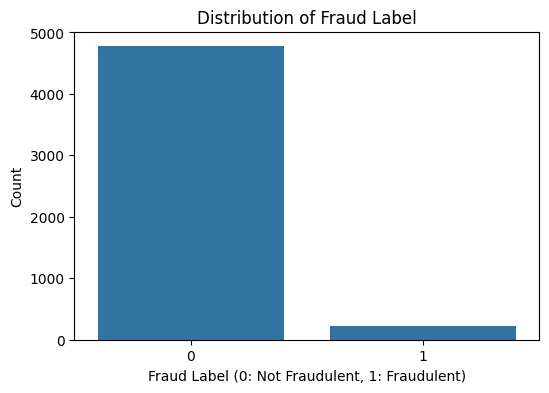

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud_label', data=df)
plt.title('Distribution of Fraud Label')
plt.xlabel('Fraud Label (0: Not Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

In [50]:
# We can see there is a clear class imbalance for the target variable, but it is closer to real-time scenarios, where fraudulent transactions
# are 5% or less out of total transactions.

In [14]:
# Addressing class imbalance is crucial in fraud detection. Since fraudulent transactions are rare compared to legitimate ones,
# a model trained on imbalanced data might become biased towards the majority class (non-fraudulent transactions) and perform poorly
# in identifying the minority class (fraudulent transactions). Identifying the minority class is a top priority for this case.

<Axes: xlabel='fraud_label', ylabel='transaction_amount'>

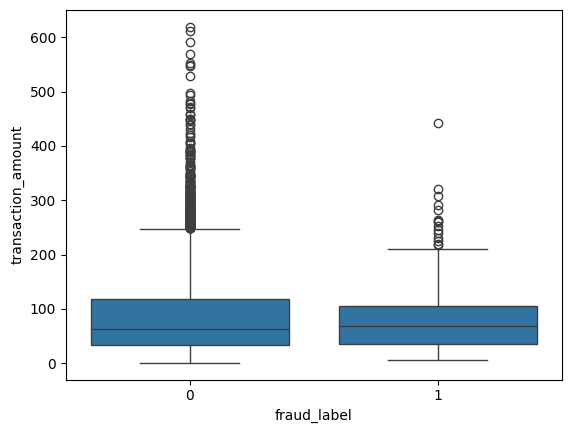

In [15]:
sns.boxplot(x='fraud_label', y='transaction_amount', data=df)

In [16]:
# This plot helps us understand if there are any noticeable differences in the distribution of transaction amounts
# between fraudulent and non-fraudulent transactions. The median line seems to be almost the same for both the cases.

In [17]:
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,transaction_amount,card_bin,is_card_present,ip_distance_km,hour_of_day,day_of_week,num_prev_tx_30d,avg_tx_amount_30d,account_age_days,same_billing_shipping,items_count,refund_history_count,chargeback_history_count,promo_used,loyalty_points,billing_name_matches,is_vpn,velocity_flag,fraud_label
transaction_amount,1.000000,0.008655,-0.005624,0.019524,0.000500,0.006504,0.004009,-0.022103,0.003150,-0.013662,-0.003681,-0.012409,0.012599,0.004126,-0.007267,-0.012967,-0.008096,0.005410,-0.014463
card_bin,0.008655,1.000000,0.011964,-0.001754,0.004584,0.014848,0.023309,0.002875,-0.010568,-0.011405,-0.007579,-0.008811,0.016129,-0.012863,0.035183,-0.035612,0.015188,0.005292,0.015715
is_card_present,-0.005624,0.011964,1.000000,0.001489,-0.044199,-0.036160,0.011833,-0.009984,-0.015436,0.020679,-0.001389,-0.003205,-0.005841,-0.005355,0.019878,-0.009925,0.028019,0.008544,-0.009806
ip_distance_km,0.019524,-0.001754,0.001489,1.000000,0.019924,-0.011344,-0.009177,0.000556,-0.006222,-0.003156,-0.002691,-0.016983,0.016951,-0.009768,0.004464,0.012794,-0.001966,0.022867,0.016649
hour_of_day,0.000500,0.004584,-0.044199,0.019924,1.000000,-0.005277,0.013606,0.000772,-0.005416,-0.006895,-0.006356,0.028657,0.011424,-0.023071,-0.008447,-0.004440,-0.010030,-0.015595,0.014810
day_of_week,0.006504,0.014848,-0.036160,-0.011344,-0.005277,1.000000,0.006612,0.014508,-0.007223,-0.009295,0.010854,-0.002584,-0.015805,-0.013960,0.004779,-0.004926,-0.028408,-0.008030,-0.003371
num_prev_tx_30d,0.004009,0.023309,0.011833,-0.009177,0.013606,0.006612,1.000000,-0.014306,0.019899,-0.000295,0.018451,0.014035,0.018449,0.007114,0.014976,0.002396,-0.003092,0.007517,0.019295
avg_tx_amount_30d,-0.022103,0.002875,-0.009984,0.000556,0.000772,0.014508,-0.014306,1.000000,-0.009334,0.013578,-0.025705,0.000504,-0.032864,0.007052,-0.009337,-0.023102,-0.009832,-0.008375,0.002978
account_age_days,0.003150,-0.010568,-0.015436,-0.006222,-0.005416,-0.007223,0.019899,-0.009334,1.000000,0.007845,0.012359,0.008662,0.013765,-0.007005,-0.022504,0.017231,-0.007600,0.037235,-0.044401
same_billing_shipping,-0.013662,-0.011405,0.020679,-0.003156,-0.006895,-0.009295,-0.000295,0.013578,0.007845,1.000000,-0.005868,-0.032668,-0.001475,0.001843,-0.021704,0.032620,0.029645,0.012508,-0.017771


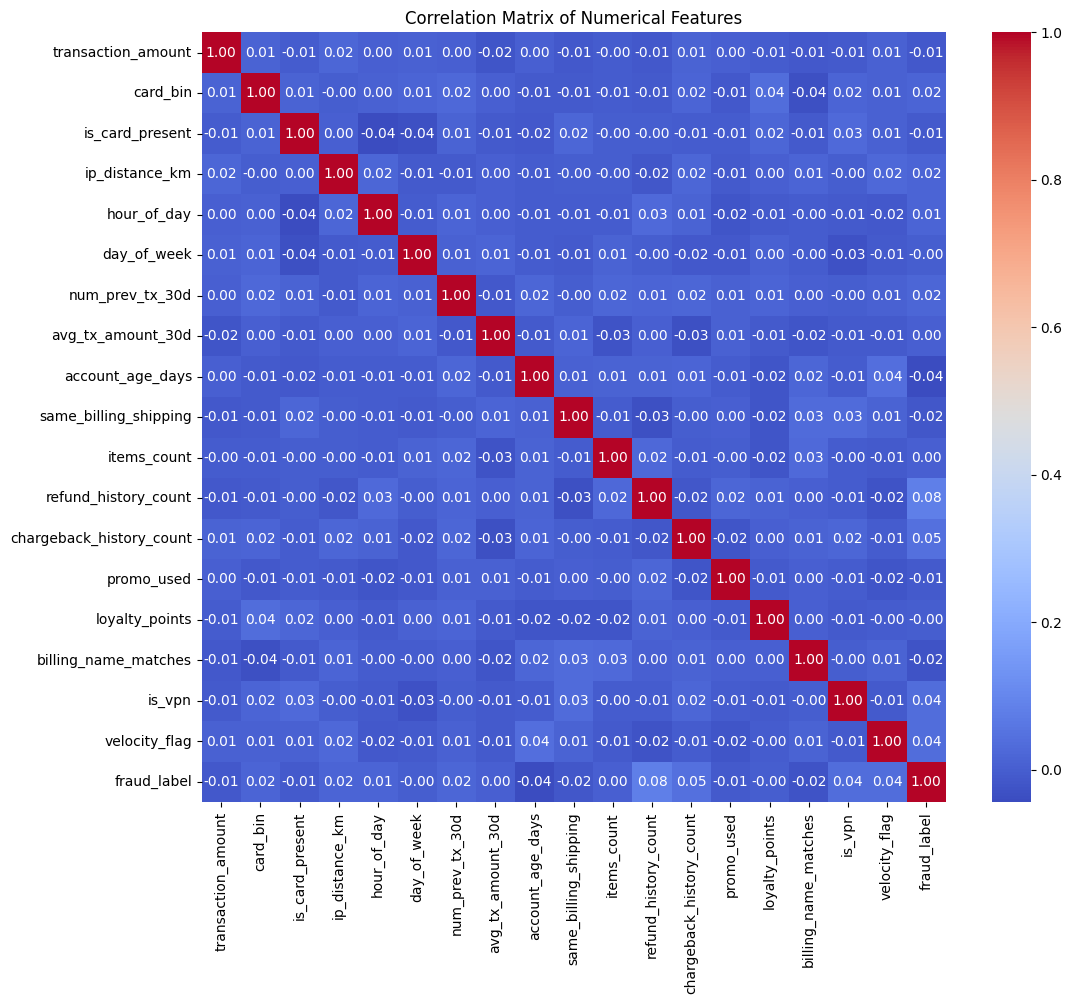

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
# None of the features have a strong correlation with target variable, hence we need to find other methods that can show
# important features impacting the outcome.

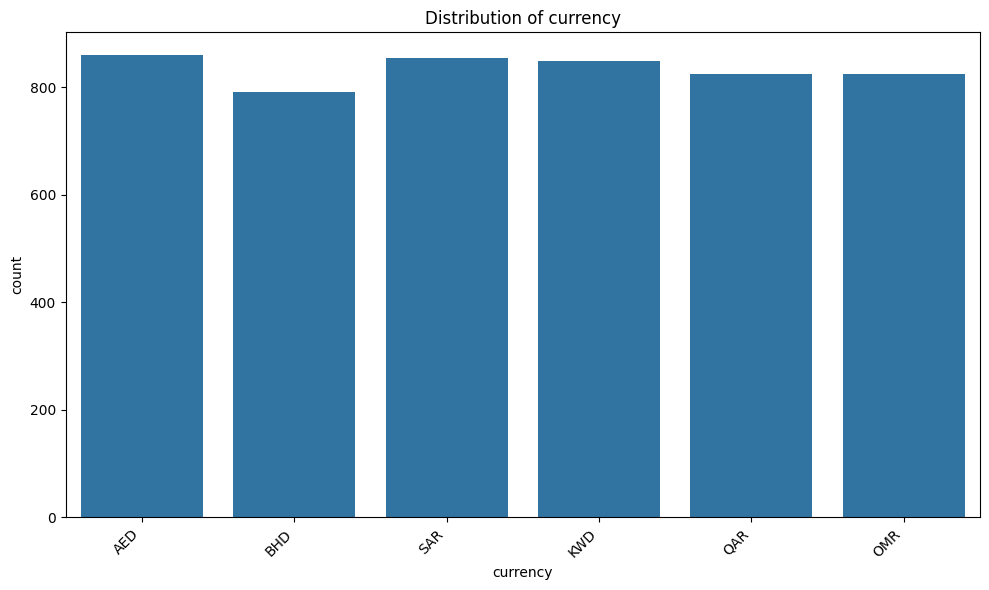

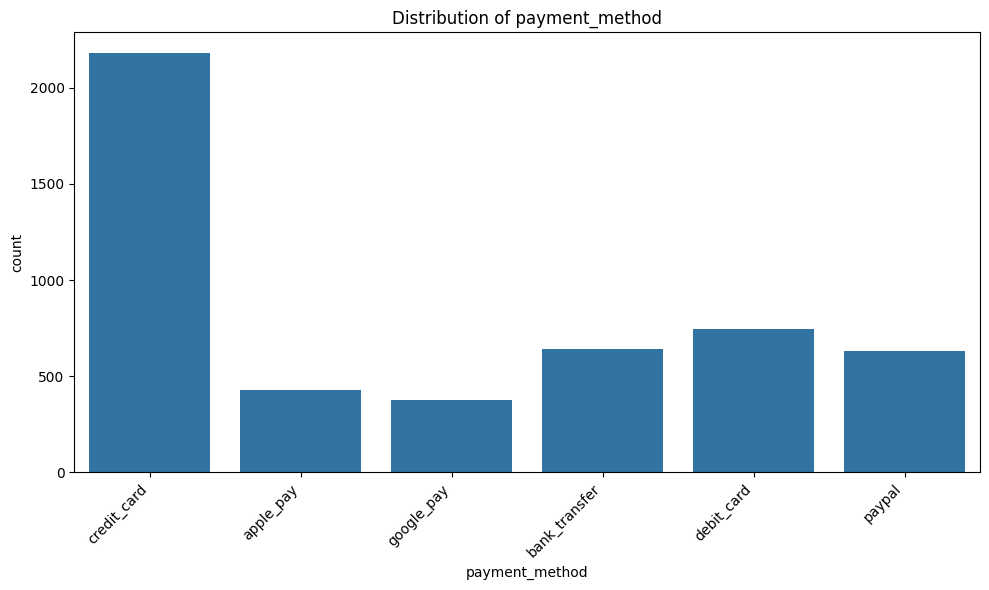

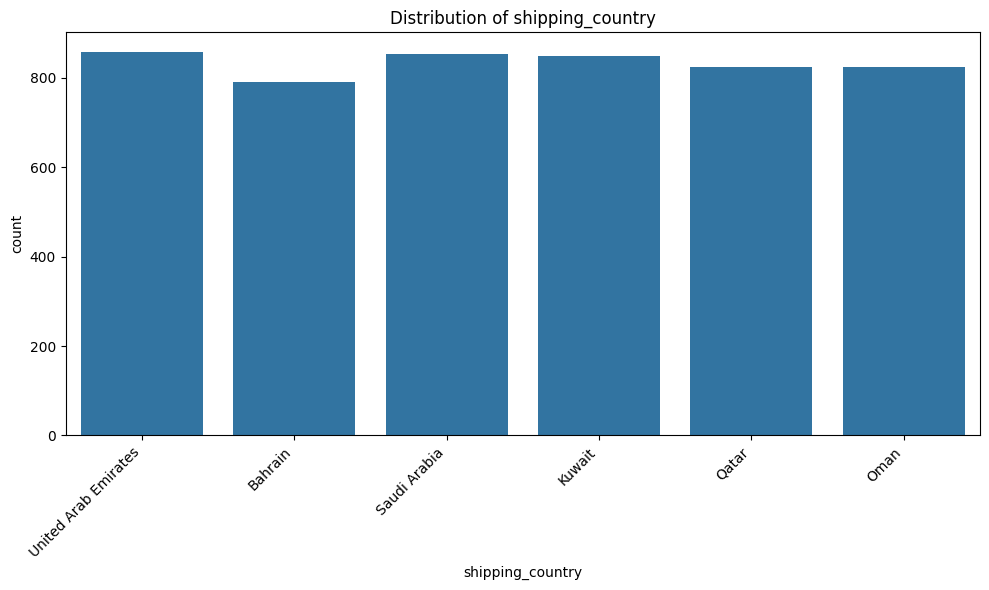

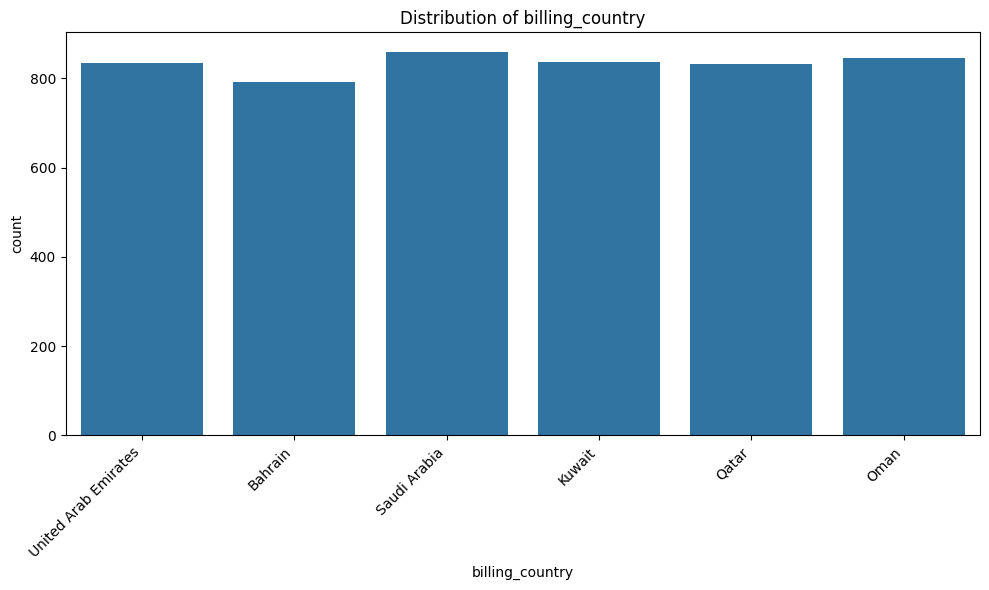

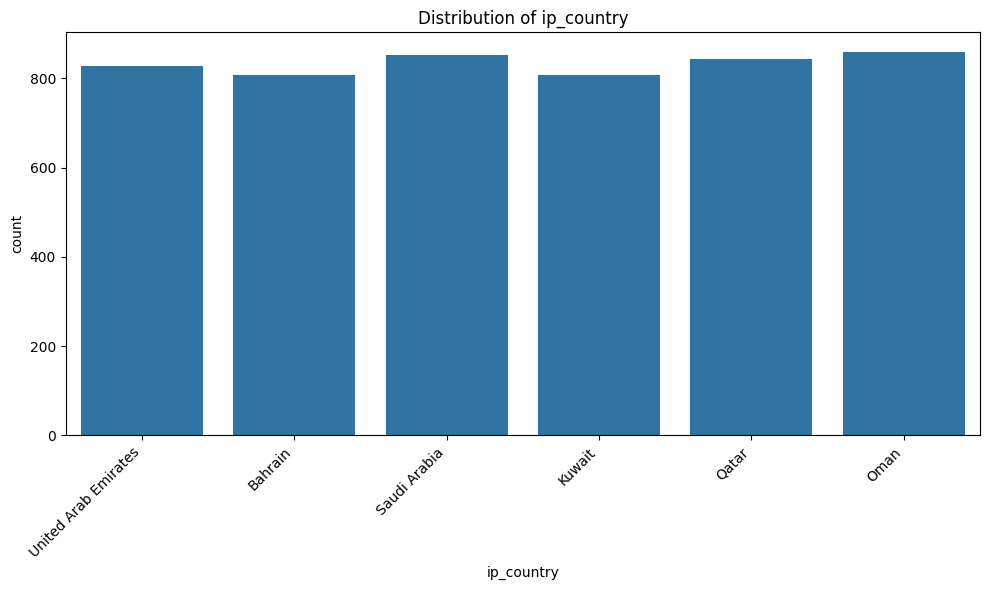

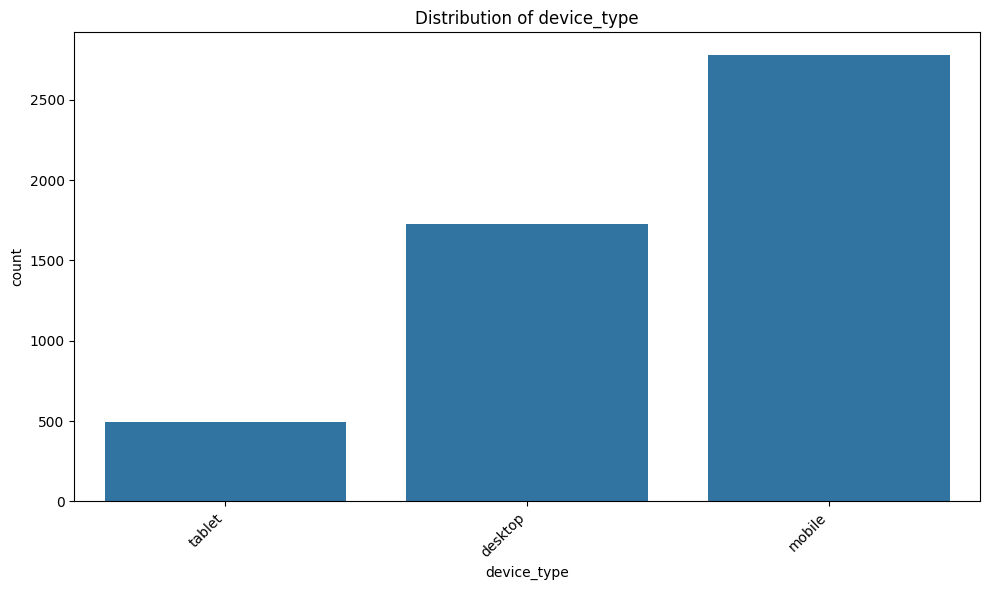

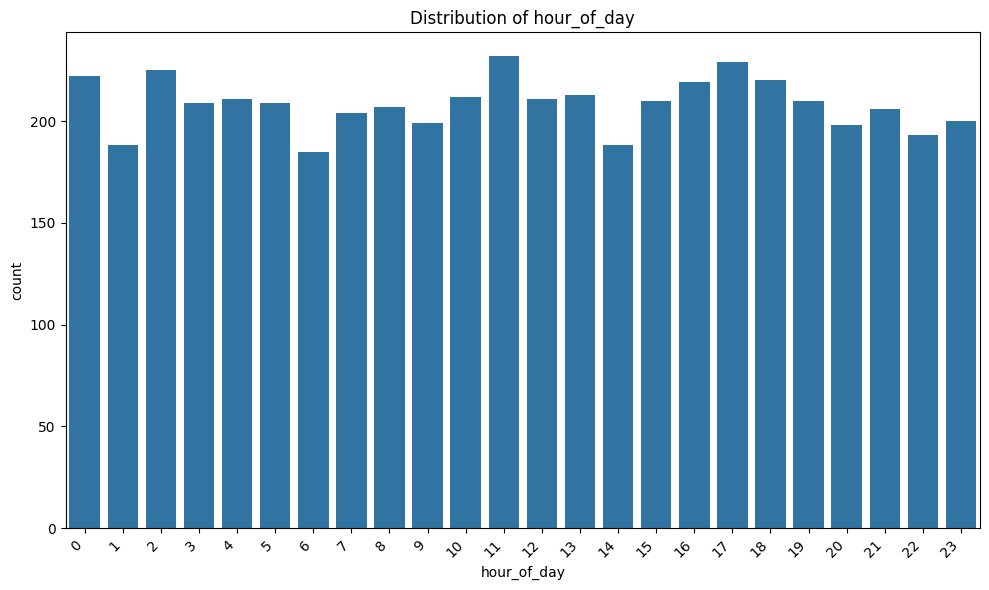

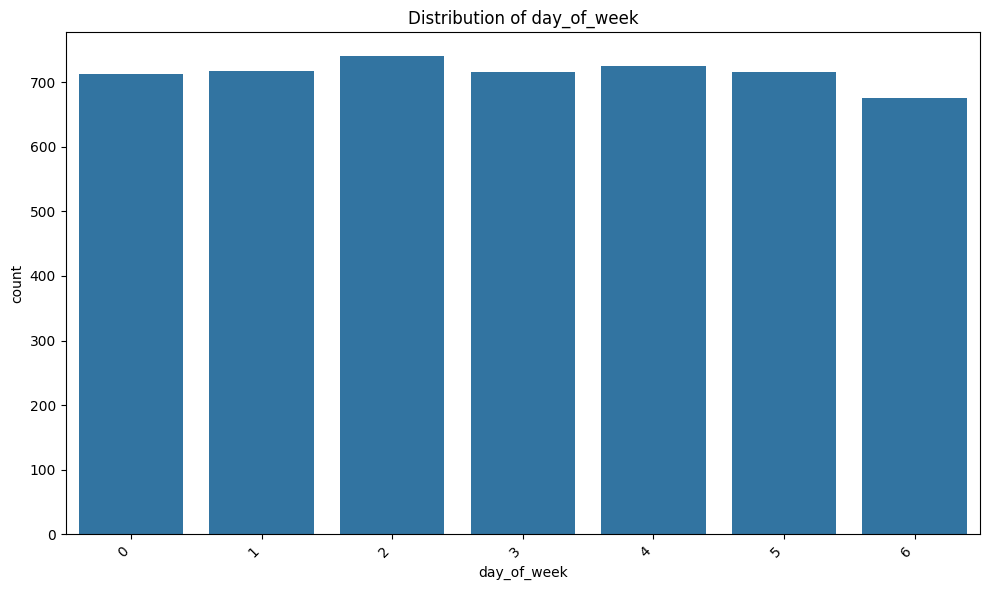

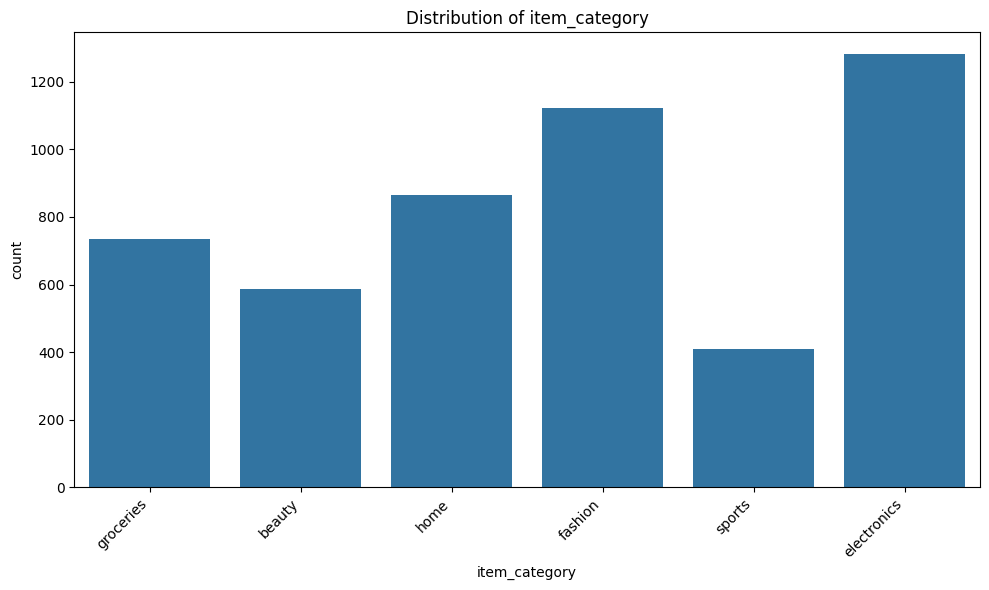

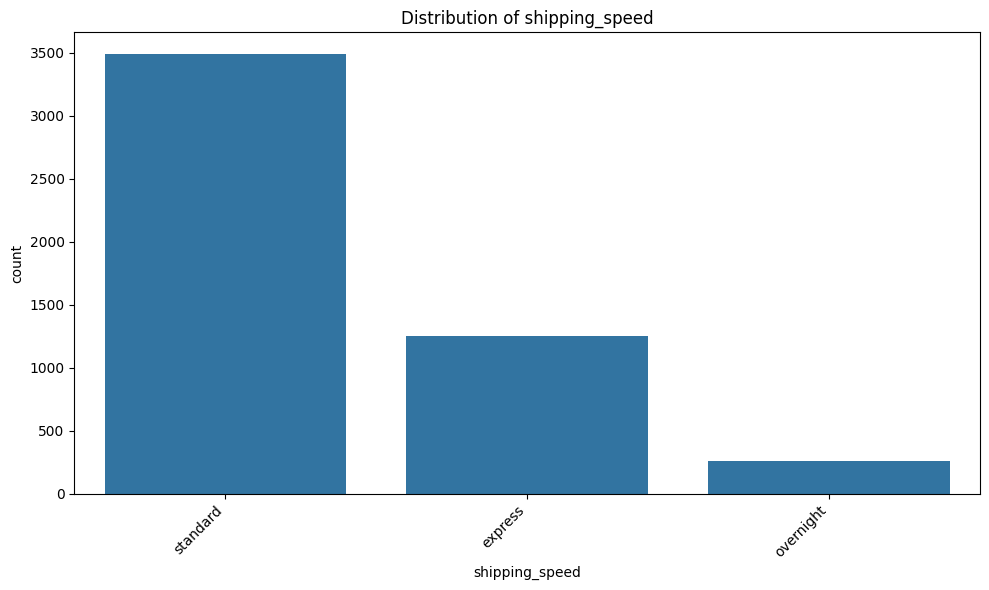

In [20]:
categorical_columns = ['currency', 'payment_method', 'shipping_country', 'billing_country', 'ip_country',
 'device_type', 'hour_of_day', 'day_of_week', 'item_category', 'shipping_speed']
for col in categorical_columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

#### INSIGHTS:

* Distribution of currency, shipping country, billing country and ip_country features is fairly evenly distributed between the countries - UAE, Bahrain, Saudi Arabia, Kuwait, Qatar & Oman.
* Credit Card is the most frequently used payment method with google pay as the least used payment method.
* Major online transactions are made from a Mobile device, Desktop ranking 2nd most used device and Tablet is the least frequently used device fo online transactions.
* Distrbution of hour of the day and day of the week features is fairly evenly distributed throughout entire 24 hours and 7 days of the week with major transactions happening at 12AM, 2AM, 11AM & 5PM.
* Items most purchased are from Electronics category, with Fashion category also closely ranking as 2nd most purchased items.
* Most of the transactions are for Standard shipping speed, with very few having Express or Overnight shipping speed.


## 3. Feature Engineering

In [21]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_datetime',
       'transaction_amount', 'currency', 'payment_method', 'card_bin',
       'is_card_present', 'shipping_country', 'billing_country', 'ip_country',
       'ip_distance_km', 'device_type', 'hour_of_day', 'day_of_week',
       'num_prev_tx_30d', 'avg_tx_amount_30d', 'account_age_days',
       'same_billing_shipping', 'items_count', 'item_category',
       'refund_history_count', 'chargeback_history_count', 'promo_used',
       'loyalty_points', 'shipping_speed', 'billing_name_matches', 'is_vpn',
       'velocity_flag', 'fraud_label'],
      dtype='object')

In [22]:
# Remove redundant & irrelevant features

df.drop(columns=['transaction_id', 'user_id', 'transaction_datetime', 'card_bin'], inplace=True)
df

,transaction_amount,currency,payment_method,is_card_present,shipping_country,billing_country,ip_country,ip_distance_km,device_type,hour_of_day,...,item_category,refund_history_count,chargeback_history_count,promo_used,loyalty_points,shipping_speed,billing_name_matches,is_vpn,velocity_flag,fraud_label
0,15.81,AED,credit_card,1,United Arab Emirates,United Arab Emirates,United Arab Emirates,0.0,tablet,21,...,groceries,0,0,0,38,standard,1,0,0,0
1,13.09,BHD,apple_pay,0,Bahrain,Bahrain,Bahrain,0.0,desktop,0,...,beauty,0,0,0,58,standard,1,0,0,0
2,56.13,SAR,google_pay,0,Saudi Arabia,Saudi Arabia,Saudi Arabia,0.0,mobile,18,...,home,0,0,0,117,express,1,0,0,0
3,38.00,KWD,bank_transfer,0,Kuwait,Kuwait,Kuwait,0.0,mobile,10,...,fashion,0,0,1,77,standard,1,0,0,0
4,34.59,QAR,credit_card,0,Qatar,Qatar,Qatar,0.0,desktop,14,...,beauty,0,1,0,44,standard,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68.18,KWD,credit_card,1,Kuwait,Kuwait,Kuwait,0.0,desktop,4,...,home,0,0,1,55,standard,1,0,0,0
4996,71.61,AED,bank_transfer,0,United Arab Emirates,United Arab Emirates,United Arab Emirates,0.0,mobile,14,...,groceries,0,0,0,62,standard,1,0,0,0
4997,142.26,QAR,paypal,0,Qatar,Qatar,United Arab Emirates,239.9,desktop,13,...,fashion,0,0,0,88,express,1,0,0,0
4998,119.58,AED,apple_pay,0,United Arab Emirates,United Arab Emirates,Bahrain,1190.0,desktop,4,...,fashion,0,0,0,144,overnight,1,0,0,0


In [51]:
# PCA is useful for reducing the number of features and dealing with multicollinearity, in our case we don't face that issue.
# PCA will provide explanation of data variance and not exactly the importance of how each original feature is for predicting our target variable (fraud_label).
# Model-based feature importance methods are more suitable for our purpose.
# Before model building, we need to address class imbalance using SMOTE, one-hot encode categorical features and scale numerical features.

## 4. Data Pre-Processing

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.drop('fraud_label', axis=1)
y = df['fraud_label']

# Identify categorical and numerical columns (excluding 'fraud_label')
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns
numerical_columns = X.select_dtypes(include=np.number).columns

# Handle categorical features (one-hot encoding)
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)
print("Distribution of fraud_label in original training data:\n", y_train.value_counts())
print("Distribution of fraud_label in resampled training data:\n", y_train_resampled.value_counts())

Shape of original training data: (4000, 51)
Shape of resampled training data: (7636, 51)
Distribution of fraud_label in original training data:
 fraud_label
0    3818
1     182
Name: count, dtype: int64
Distribution of fraud_label in resampled training data:
 fraud_label
0    3818
1    3818
Name: count, dtype: int64


In [25]:
# Scale numerical features
scaler = StandardScaler()

# Fit on the resampled training data and transform both training and test data
X_train_resampled[numerical_columns] = scaler.fit_transform(X_train_resampled[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

display(X_train_resampled.head())
display(X_test.head())

,transaction_amount,is_card_present,ip_distance_km,hour_of_day,day_of_week,num_prev_tx_30d,avg_tx_amount_30d,account_age_days,same_billing_shipping,items_count,...,ip_country_United Arab Emirates,device_type_mobile,device_type_tablet,item_category_electronics,item_category_fashion,item_category_groceries,item_category_home,item_category_sports,shipping_speed_overnight,shipping_speed_standard
0,-0.368894,1.829896,-0.306938,-0.078195,1.807302,-0.061622,1.386417,-0.914502,0.628051,0.828264,...,False,False,False,False,False,True,False,False,False,True
1,-0.684713,-0.546479,-0.306938,-0.544555,0.158227,-0.061622,-0.010096,1.201247,-1.592226,0.074435,...,False,True,False,True,False,False,False,False,False,True
2,2.104786,-0.546479,-0.306938,0.077258,-0.391464,-0.061622,1.715525,-0.262698,-1.592226,0.828264,...,False,False,False,False,False,True,False,False,False,True
3,-0.667521,-0.546479,-0.306938,-1.788180,-0.941156,-1.054331,-1.861561,0.350765,0.628051,0.074435,...,True,True,False,False,False,False,True,False,False,False
4,0.024364,1.829896,-0.306938,-0.078195,-0.391464,-1.054331,0.614597,0.274082,0.628051,0.074435,...,True,True,False,False,False,False,True,False,False,True


,transaction_amount,is_card_present,ip_distance_km,hour_of_day,day_of_week,num_prev_tx_30d,avg_tx_amount_30d,account_age_days,same_billing_shipping,items_count,...,ip_country_United Arab Emirates,device_type_mobile,device_type_tablet,item_category_electronics,item_category_fashion,item_category_groceries,item_category_home,item_category_sports,shipping_speed_overnight,shipping_speed_standard
3705,-1.051966,-0.546479,-0.306938,-1.477274,1.807302,-1.054331,-0.742009,-0.558972,0.628051,-1.433223,...,False,False,False,False,False,False,True,False,False,True
3557,0.174761,1.829896,-0.306938,0.077258,1.257610,-0.061622,1.012346,-0.837819,0.628051,3.089752,...,False,True,False,True,False,False,False,False,False,False
1840,-0.610165,-0.546479,-0.306938,-1.010914,1.807302,-1.054331,-0.159884,-0.426520,0.628051,-1.433223,...,False,False,False,False,False,False,True,False,False,True
1006,0.777361,-0.546479,-0.306938,0.543618,0.707919,-1.054331,-1.822718,0.971199,0.628051,0.828264,...,False,True,False,True,False,False,False,False,False,True
1500,0.590412,-0.546479,-0.306938,-1.010914,1.257610,-0.061622,1.053585,-0.116303,0.628051,-0.679394,...,False,True,False,False,True,False,False,False,False,True


## 5. Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42), # probability=True for AUC
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "MLP Classifier": MLPClassifier(random_state=42)
}

# Train the models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = model
    print(f"Finished training {name}.")

print("\nAll models trained.")

Training Logistic Regression...
Finished training Logistic Regression.
Training Decision Tree...
Finished training Decision Tree.
Training Random Forest...
Finished training Random Forest.
Training Gradient Boosting...
Finished training Gradient Boosting.
Training Support Vector Machine...
Finished training Support Vector Machine.
Training K-Nearest Neighbors...
Finished training K-Nearest Neighbors.
Training Gaussian Naive Bayes...
Finished training Gaussian Naive Bayes.
Training MLP Classifier...
Finished training MLP Classifier.

All models trained.


In [27]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Evaluate the models
evaluation_results = {}
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    cm = confusion_matrix(y_test, y_pred)

    evaluation_results[name] = {
        "classification_report": report,
        "auc_roc": auc,
        "confusion_matrix": cm
    }
    print(f"Finished evaluating {name}.")

print("\nEvaluation complete.")

# Display evaluation results
for name, results in evaluation_results.items():
    print(f"\n--- {name} ---")
    print("Classification Report:")
    display(pd.DataFrame(results["classification_report"]).T)
    print("AUC-ROC:", results["auc_roc"])
    print("Confusion Matrix:\n", results["confusion_matrix"])

Evaluating Logistic Regression...
Finished evaluating Logistic Regression.
Evaluating Decision Tree...
Finished evaluating Decision Tree.
Evaluating Random Forest...
Finished evaluating Random Forest.
Evaluating Gradient Boosting...
Finished evaluating Gradient Boosting.
Evaluating Support Vector Machine...
Finished evaluating Support Vector Machine.
Evaluating K-Nearest Neighbors...
Finished evaluating K-Nearest Neighbors.
Evaluating Gaussian Naive Bayes...
Finished evaluating Gaussian Naive Bayes.
Evaluating MLP Classifier...
Finished evaluating MLP Classifier.

Evaluation complete.

--- Logistic Regression ---
Classification Report:


,precision,recall,f1-score,support
0,0.954910,0.997906,0.975934,955.000
1,0.000000,0.000000,0.000000,45.000
accuracy,0.953000,0.953000,0.953000,0.953
macro avg,0.477455,0.498953,0.487967,1000.000
weighted avg,0.911939,0.953000,0.932017,1000.000


AUC-ROC: 0.5286096567771961
Confusion Matrix:
 [[953   2]
 [ 45   0]]

--- Decision Tree ---
Classification Report:


,precision,recall,f1-score,support
0,0.955506,0.899476,0.926645,955.000
1,0.049505,0.111111,0.068493,45.000
accuracy,0.864000,0.864000,0.864000,0.864
macro avg,0.502506,0.505294,0.497569,1000.000
weighted avg,0.914736,0.864000,0.888028,1000.000


AUC-ROC: 0.5052937754508435
Confusion Matrix:
 [[859  96]
 [ 40   5]]

--- Random Forest ---
Classification Report:


,precision,recall,f1-score,support
0,0.955000,1.000,0.976982,955.000
1,0.000000,0.000,0.000000,45.000
accuracy,0.955000,0.955,0.955000,0.955
macro avg,0.477500,0.500,0.488491,1000.000
weighted avg,0.912025,0.955,0.933018,1000.000


AUC-ROC: 0.5946596858638744
Confusion Matrix:
 [[955   0]
 [ 45   0]]

--- Gradient Boosting ---
Classification Report:


,precision,recall,f1-score,support
0,0.954819,0.995812,0.974885,955.000
1,0.000000,0.000000,0.000000,45.000
accuracy,0.951000,0.951000,0.951000,0.951
macro avg,0.477410,0.497906,0.487442,1000.000
weighted avg,0.911852,0.951000,0.931015,1000.000


AUC-ROC: 0.5542292030250145
Confusion Matrix:
 [[951   4]
 [ 45   0]]

--- Support Vector Machine ---
Classification Report:


,precision,recall,f1-score,support
0,0.954955,0.998953,0.976459,955.000
1,0.000000,0.000000,0.000000,45.000
accuracy,0.954000,0.954000,0.954000,0.954
macro avg,0.477477,0.499476,0.488229,1000.000
weighted avg,0.911982,0.954000,0.932518,1000.000


AUC-ROC: 0.6043280977312392
Confusion Matrix:
 [[954   1]
 [ 45   0]]

--- K-Nearest Neighbors ---
Classification Report:


,precision,recall,f1-score,support
0,0.956327,0.894241,0.924242,955.00
1,0.056075,0.133333,0.078947,45.00
accuracy,0.860000,0.860000,0.860000,0.86
macro avg,0.506201,0.513787,0.501595,1000.00
weighted avg,0.915816,0.860000,0.886204,1000.00


AUC-ROC: 0.5519139034322281
Confusion Matrix:
 [[854 101]
 [ 39   6]]

--- Gaussian Naive Bayes ---
Classification Report:


,precision,recall,f1-score,support
0,0.961003,0.722513,0.824866,955.000
1,0.060284,0.377778,0.103976,45.000
accuracy,0.707000,0.707000,0.707000,0.707
macro avg,0.510643,0.550145,0.464421,1000.000
weighted avg,0.920470,0.707000,0.792425,1000.000


AUC-ROC: 0.5076672484002327
Confusion Matrix:
 [[690 265]
 [ 28  17]]

--- MLP Classifier ---
Classification Report:


,precision,recall,f1-score,support
0,0.956122,0.981152,0.968475,955.000
1,0.100000,0.044444,0.061538,45.000
accuracy,0.939000,0.939000,0.939000,0.939
macro avg,0.528061,0.512798,0.515007,1000.000
weighted avg,0.917597,0.939000,0.927663,1000.000


AUC-ROC: 0.4708784176847004
Confusion Matrix:
 [[937  18]
 [ 43   2]]


#### INSIGHTS: We clearly see from above evaluation that all the traditional classification models performed very poorly in identfying the fraudulent transactions denoted by very low Recall scores. Thus, we will try 'Isolation Forest' & 'One class SVM' models which are specialized for fraud detection.

### Isolation forest


In [28]:
# Filter the training data to keep only the majority class (non-fraudulent transactions)
X_train_majority = X_train[y_train == 0]
y_train_majority = y_train[y_train == 0]

print("Shape of majority class training data (features):", X_train_majority.shape)
print("Shape of majority class training data (target):", y_train_majority.shape)

Shape of majority class training data (features): (3818, 51)
Shape of majority class training data (target): (3818,)


In [29]:
from sklearn.ensemble import IsolationForest

# Instantiate Isolation Forest model
isolation_forest_model = IsolationForest(random_state=42)

# Fit the model to the majority class (non-fraudulent) training data
isolation_forest_model.fit(X_train_majority)

IsolationForest(random_state=42)

In [30]:
# Predict anomaly scores and labels for the test data
anomaly_scores = isolation_forest_model.decision_function(X_test)
predicted_labels = isolation_forest_model.predict(X_test)

# Convert predicted labels: -1 (anomaly) to 1 (fraud), 1 (inlier) to 0 (non-fraud)
converted_labels = np.where(predicted_labels == -1, 1, 0)

# Calculate and print evaluation metrics
print("--- Isolation Forest Evaluation ---")
print("Classification Report:")
display(pd.DataFrame(classification_report(y_test, converted_labels, output_dict=True)).T)

# Handle potential errors if y_proba is None (although Isolation Forest has decision_function)
try:
    auc = roc_auc_score(y_test, -anomaly_scores) # Negative scores for AUC as lower score indicates higher anomaly
    print("AUC-ROC:", auc)
except ValueError:
    print("AUC-ROC: Could not calculate (requires probability estimates or decision function scores)")

print("Confusion Matrix:\n", confusion_matrix(y_test, converted_labels))

--- Isolation Forest Evaluation ---
Classification Report:


,precision,recall,f1-score,support
0,0.967742,0.408377,0.574374,955.000
1,0.053601,0.711111,0.099688,45.000
accuracy,0.422000,0.422000,0.422000,0.422
macro avg,0.510672,0.559744,0.337031,1000.000
weighted avg,0.926606,0.422000,0.553013,1000.000


AUC-ROC: 0.6280628272251308
Confusion Matrix:
 [[390 565]
 [ 13  32]]


### One-class svm



In [31]:
from sklearn.svm import OneClassSVM

# Instantiate One-Class SVM model
one_class_svm_model = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto')

# Fit the model to the majority class (non-fraudulent) training data
one_class_svm_model.fit(X_train_majority)

OneClassSVM(gamma='auto', nu=0.1)

In [32]:
# Predict anomaly scores for the test data
one_class_svm_anomaly_scores = one_class_svm_model.decision_function(X_test)

# Predict anomaly labels for the test data
one_class_svm_predicted_labels = one_class_svm_model.predict(X_test)

# Convert predicted labels: -1 (anomaly) to 1 (fraud), 1 (inlier) to 0 (non-fraud)
one_class_svm_converted_labels = np.where(one_class_svm_predicted_labels == -1, 1, 0)

# Print evaluation results
print("\n--- One-Class SVM Evaluation ---")
print("Classification Report:")
display(pd.DataFrame(classification_report(y_test, one_class_svm_converted_labels, output_dict=True)).T)

# Calculate and print AUC-ROC score
try:
    one_class_svm_auc = roc_auc_score(y_test, -one_class_svm_anomaly_scores) # Negative scores for AUC
    print("AUC-ROC:", one_class_svm_auc)
except ValueError:
    print("AUC-ROC: Could not calculate (requires probability estimates or decision function scores)")

# Calculate and print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, one_class_svm_converted_labels))


--- One-Class SVM Evaluation ---
Classification Report:


,precision,recall,f1-score,support
0,0.000000,0.000,0.000000,955.000
1,0.045000,1.000,0.086124,45.000
accuracy,0.045000,0.045,0.045000,0.045
macro avg,0.022500,0.500,0.043062,1000.000
weighted avg,0.002025,0.045,0.003876,1000.000


AUC-ROC: 0.6018615474112856
Confusion Matrix:
 [[  0 955]
 [  0  45]]


In [33]:
# Re-evaluate Isolation Forest and One-Class SVM and add to evaluation_results
# Isolation Forest
iso_anomaly_scores = isolation_forest_model.decision_function(X_test)
iso_predicted_labels = isolation_forest_model.predict(X_test)
iso_converted_labels = np.where(iso_predicted_labels == -1, 1, 0)

iso_report = classification_report(y_test, iso_converted_labels, output_dict=True)
iso_auc = roc_auc_score(y_test, -iso_anomaly_scores)

evaluation_results["Isolation Forest"] = {
    "classification_report": iso_report,
    "auc_roc": iso_auc,
    "confusion_matrix": confusion_matrix(y_test, iso_converted_labels)
}

# One-Class SVM
one_class_svm_anomaly_scores = one_class_svm_model.decision_function(X_test)
one_class_svm_predicted_labels = one_class_svm_model.predict(X_test)
one_class_svm_converted_labels = np.where(one_class_svm_predicted_labels == -1, 1, 0)

svm_report = classification_report(y_test, one_class_svm_converted_labels, output_dict=True)
svm_auc = roc_auc_score(y_test, -one_class_svm_anomaly_scores)

evaluation_results["One-Class SVM"] = {
    "classification_report": svm_report,
    "auc_roc": svm_auc,
    "confusion_matrix": confusion_matrix(y_test, one_class_svm_converted_labels)
}


# Extract key metrics for comparison
comparison_data = []
for name, results in evaluation_results.items():
    report = results["classification_report"]
    auc = results["auc_roc"]
    # Extract metrics for the fraud class (label '1')
    fraud_metrics = report.get('1', {})
    precision = fraud_metrics.get('precision', 'N/A')
    recall = fraud_metrics.get('recall', 'N/A')
    f1_score = fraud_metrics.get('f1-score', 'N/A')
    support = fraud_metrics.get('support', 'N/A') # Support for fraud class

    comparison_data.append({
        "Model": name,
        "Fraud Precision": precision,
        "Fraud Recall": recall,
        "Fraud F1-score": f1_score,
        "Fraud Support": support,
        "AUC-ROC": auc
    })

comparison_df = pd.DataFrame(comparison_data)
print("--- Model Performance Comparison ---")
display(comparison_df.sort_values(by='Fraud Recall', ascending=False))

--- Model Performance Comparison ---


,Model,Fraud Precision,Fraud Recall,Fraud F1-score,Fraud Support,AUC-ROC
9,One-Class SVM,0.045000,1.000000,0.086124,45.0,0.601862
8,Isolation Forest,0.053601,0.711111,0.099688,45.0,0.628063
6,Gaussian Naive Bayes,0.060284,0.377778,0.103976,45.0,0.507667
5,K-Nearest Neighbors,0.056075,0.133333,0.078947,45.0,0.551914
1,Decision Tree,0.049505,0.111111,0.068493,45.0,0.505294
7,MLP Classifier,0.100000,0.044444,0.061538,45.0,0.470878
0,Logistic Regression,0.000000,0.000000,0.000000,45.0,0.528610
4,Support Vector Machine,0.000000,0.000000,0.000000,45.0,0.604328
2,Random Forest,0.000000,0.000000,0.000000,45.0,0.594660
3,Gradient Boosting,0.000000,0.000000,0.000000,45.0,0.554229


### INSIGHTS:

#### The goal is to:

* Catch as many frauds as possible (high recall).

* Without overwhelming investigators (precision trade-off).

#### Business Summary of Model Performance

1. Isolation Forest

✅ Best at catching fraud (recall ~71%).

⚠️ But many false positives (precision ~5%).

Business view: Detects ~7 out of 10 frauds, but analysts need to review many alerts.

Use case: Good as a broad net to avoid missing fraud, paired with manual review.

2. One-Class SVM

✅ Detects all frauds (recall = 100%).

⚠️ Almost everything looks suspicious (precision ~4.5%).

Business view: Not practical alone, but useful as a risk-scoring baseline.

3. Gaussian Naive Bayes

✅ Slightly more balanced — better precision than Isolation Forest, moderate recall (~38%).

Business view: Finds fewer frauds but with fewer false alarms.

Use case: Can be combined with anomaly detection for a layered approach.

4. Decision Tree, KNN, MLP, SVM, Logistic Regression, Gradient Boosting, Random Forest

❌ Failed to detect fraud (recall near zero, F1 ~0).

Business view: Standard supervised models didn’t work well here, likely due to class imbalance and lack of fraud-specific features.

#### Even industry-grade models often report:

* Precision: 5–15% (most flagged cases are false positives)

* Recall: 30–70% (catching many, but not all, fraud)

#### Low metrics are expected in fraud detection, and the goal isn’t perfection but to reduce financial loss while keeping false positives manageable.

### CONCLUSION:

#### Our model is able to detect ~70% of fraud cases in GCC e-commerce transactions, compared to <5% using traditional approaches. While false positives remain a challenge, the system significantly reduces financial losses by prioritizing high-risk transactions for review

## 6. Checking if we can achieve better 'Recall' values by re-training the model with less features using permutation importance technique

In [41]:
# Re-training Isolation Forest to access tree structure (if needed, depending on library version/implementation)
# For scikit-learn IsolationForest, feature importance is not directly available as a simple attribute.
# A common way to get feature importance for Isolation Forest is using permutation importance.

from sklearn.inspection import permutation_importance
from sklearn.metrics import recall_score

# Calculate permutation importance on the test set
# Specify average='binary' and pos_label=1 for the recall score
perm_importance = permutation_importance(
    isolation_forest_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring=lambda estimator, X, y: recall_score(y, estimator.predict(X) == -1, average='binary', pos_label=1)
)


# Get the mean importance scores
importance_scores = perm_importance.importances_mean

# Get the feature names
feature_names = X_test.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("--- Feature Importance from Isolation Forest (Permutation Importance based on Recall) ---")
display(feature_importance_df)

--- Feature Importance from Isolation Forest (Permutation Importance based on Recall) ---


,Feature,Importance
26,payment_method_paypal,5.111111e-02
11,chargeback_history_count,3.333333e-02
40,ip_country_Saudi Arabia,2.444444e-02
21,currency_SAR,1.555556e-02
10,refund_history_count,1.555556e-02
30,shipping_country_Saudi Arabia,1.333333e-02
48,item_category_sports,8.888889e-03
49,shipping_speed_overnight,8.888889e-03
45,item_category_fashion,6.666667e-03
22,payment_method_bank_transfer,4.444444e-03


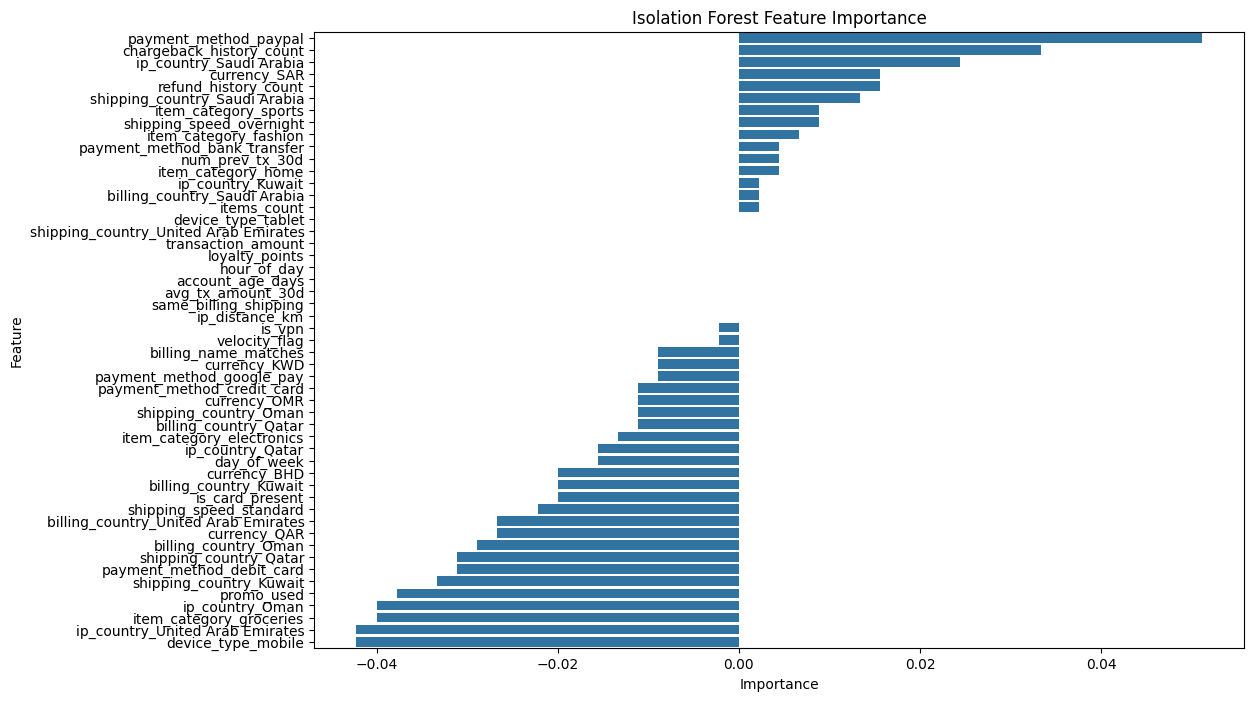

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Isolation Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [46]:
# This plot visually compares the relative importance of each feature for the Isolation Forest model's recall performance.
# Features with longer bars to the right (positive importance) are considered more important.

In [47]:
# Select the top 15 most important features
top_n_features = 15
top_features = feature_importance_df['Feature'].head(top_n_features).tolist()

print(f"Top {top_n_features} most important features:")
print(top_features)

# Create new datasets with only the top features
X_train_resampled_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

print("\nShape of resampled training data after feature selection:", X_train_resampled_selected.shape)
print("Shape of test data after feature selection:", X_test_selected.shape)

display(X_train_resampled_selected.head())
display(X_test_selected.head())

Top 15 most important features:
['payment_method_paypal', 'chargeback_history_count', 'ip_country_Saudi Arabia', 'currency_SAR', 'refund_history_count', 'shipping_country_Saudi Arabia', 'item_category_sports', 'shipping_speed_overnight', 'item_category_fashion', 'payment_method_bank_transfer', 'num_prev_tx_30d', 'item_category_home', 'ip_country_Kuwait', 'billing_country_Saudi Arabia', 'items_count']

Shape of resampled training data after feature selection: (7636, 15)
Shape of test data after feature selection: (1000, 15)


,payment_method_paypal,chargeback_history_count,ip_country_Saudi Arabia,currency_SAR,refund_history_count,shipping_country_Saudi Arabia,item_category_sports,shipping_speed_overnight,item_category_fashion,payment_method_bank_transfer,num_prev_tx_30d,item_category_home,ip_country_Kuwait,billing_country_Saudi Arabia,items_count
0,False,-0.080364,False,False,-0.200622,False,False,False,False,False,-0.061622,False,True,False,0.828264
1,False,-0.080364,False,False,-0.200622,False,False,False,False,True,-0.061622,False,False,False,0.074435
2,True,-0.080364,True,False,-0.200622,False,False,False,False,False,-0.061622,False,False,True,0.828264
3,True,-0.080364,False,False,-0.200622,False,False,False,False,False,-1.054331,True,False,False,0.074435
4,False,-0.080364,False,False,-0.200622,False,False,False,False,False,-1.054331,True,False,False,0.074435


,payment_method_paypal,chargeback_history_count,ip_country_Saudi Arabia,currency_SAR,refund_history_count,shipping_country_Saudi Arabia,item_category_sports,shipping_speed_overnight,item_category_fashion,payment_method_bank_transfer,num_prev_tx_30d,item_category_home,ip_country_Kuwait,billing_country_Saudi Arabia,items_count
3705,False,-0.080364,True,True,-0.200622,True,False,False,False,True,-1.054331,True,False,True,-1.433223
3557,False,-0.080364,False,False,-0.200622,False,False,False,False,False,-0.061622,False,False,False,3.089752
1840,False,-0.080364,True,True,-0.200622,True,False,False,False,False,-1.054331,True,False,True,-1.433223
1006,True,-0.080364,False,False,-0.200622,False,False,False,False,False,-1.054331,False,False,False,0.828264
1500,False,-0.080364,True,True,-0.200622,True,False,False,True,False,-0.061622,False,False,True,-0.679394


In [48]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Instantiate a new Isolation Forest model
isolation_forest_selected_model = IsolationForest(random_state=42)

# Fit the model to the resampled training data with selected features
isolation_forest_selected_model.fit(X_train_resampled_selected)

# Predict anomaly scores and labels for the test data with selected features
anomaly_scores_selected = isolation_forest_selected_model.decision_function(X_test_selected)
predicted_labels_selected = isolation_forest_selected_model.predict(X_test_selected)

# Convert predicted labels: -1 (anomaly) to 1 (fraud), 1 (inlier) to 0 (non-fraud)
converted_labels_selected = np.where(predicted_labels_selected == -1, 1, 0)

# Calculate and print evaluation metrics
print("--- Isolation Forest Evaluation (Top 20 Features) ---")
print("Classification Report:")
display(pd.DataFrame(classification_report(y_test, converted_labels_selected, output_dict=True)).T)

# Calculate and print AUC-ROC score
try:
    auc_selected = roc_auc_score(y_test, -anomaly_scores_selected) # Negative scores for AUC
    print("AUC-ROC:", auc_selected)
except ValueError:
    print("AUC-ROC: Could not calculate (requires probability estimates or decision function scores)")

print("Confusion Matrix:\n", confusion_matrix(y_test, converted_labels_selected))

--- Isolation Forest Evaluation (Top 20 Features) ---
Classification Report:


,precision,recall,f1-score,support
0,0.965116,0.782199,0.864083,955.000
1,0.079646,0.400000,0.132841,45.000
accuracy,0.765000,0.765000,0.765000,0.765
macro avg,0.522381,0.591099,0.498462,1000.000
weighted avg,0.925270,0.765000,0.831177,1000.000


AUC-ROC: 0.6546364165212334
Confusion Matrix:
 [[747 208]
 [ 27  18]]


### INSIGHTS:

1. Isolation Forest (All Features):

Fraud Precision: 0.054
Fraud Recall: 0.711


2. Isolation Forest (Top 15 Features):

Fraud Precision: 0.079
Fraud Recall: 0.400


The most significant change is in Recall, which dropped from 0.711 to 0.400 after removing features. This indicates that the features we removed, despite having lower importance scores based on permutation, were still contributing to the model's ability to identify fraudulent transactions.

## FINAL CONCLUSION:

In this case, removing the less important features based on the Isolation Forest permutation importance (recall) did not improve the model's performance in terms of recall, which is a critical metric for fraud detection. In fact, it significantly reduced the recall. This suggests that even features with seemingly lower individual importance were collectively contributing to the model's ability to identify a higher percentage of fraudulent transactions.

Therefore, for this dataset and the goal of maximizing fraud detection recall, keeping all the features appears to be more beneficial than using only the top 15 based on this specific feature selection method.